In [1]:
!nvidia-smi

Sat Mar 13 04:18:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [3]:
image_size=[224,224]

train_image_path='/content/drive/MyDrive/Dataset/Malaria dataset/Dataset/Train'
test_image_path='/content/drive/MyDrive/Dataset/Malaria dataset/Dataset/Test'

In [4]:
vgg=VGG16(include_top=False,input_shape=image_size+[3])

58892288/58889256 [==============================] - 1s 0us/step


In [5]:
for layers in vgg.layers:
  layers.trainable=False

In [6]:
output_no=glob('/content/drive/MyDrive/Dataset/Malaria dataset/Dataset/Train/*')

In [7]:
x=Flatten()(vgg.output)
prediction=Dense(len(output_no),activation='softmax')(x)

In [8]:
model=Model(inputs=vgg.inputs,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [10]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(
    rescale=1/255
)

In [11]:
train_data=train_datagen.flow_from_directory(train_image_path,
                                             target_size=image_size,
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(test_image_path,
                                           target_size=image_size,
                                           batch_size=32)

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [14]:
fit=model.fit(train_data,
              validation_data=test_data,
              epochs=20,
              steps_per_epoch=len(train_data),
              validation_steps=len(test_data)
              )

Epoch 1/20
13/13 [==============================] - 161s 10s/step - loss: 0.8237 - accuracy: 0.5547 - val_loss: 0.6441 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 6s 447ms/step - loss: 0.5971 - accuracy: 0.6837 - val_loss: 0.5108 - val_accuracy: 0.7612
Epoch 3/20
13/13 [==============================] - 6s 446ms/step - loss: 0.4252 - accuracy: 0.8279 - val_loss: 0.5247 - val_accuracy: 0.7388
Epoch 4/20
13/13 [==============================] - 6s 445ms/step - loss: 0.3782 - accuracy: 0.8655 - val_loss: 0.4817 - val_accuracy: 0.6940
Epoch 5/20
13/13 [==============================] - 6s 448ms/step - loss: 0.3765 - accuracy: 0.8238 - val_loss: 0.3919 - val_accuracy: 0.8358
Epoch 6/20
13/13 [==============================] - 6s 444ms/step - loss: 0.3000 - accuracy: 0.9160 - val_loss: 0.3746 - val_accuracy: 0.8657
Epoch 7/20
13/13 [==============================] - 6s 442ms/step - loss: 0.2617 - accuracy: 0.9223 - val_loss: 0.3968 - val_accuracy: 0.8507
Epoch 

In [18]:
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

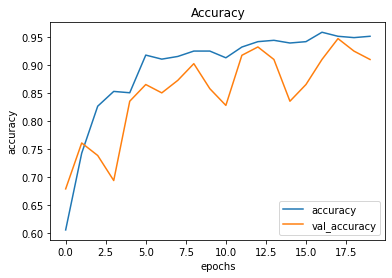

In [29]:
plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['accuracy','val_accuracy'],loc='lower right')

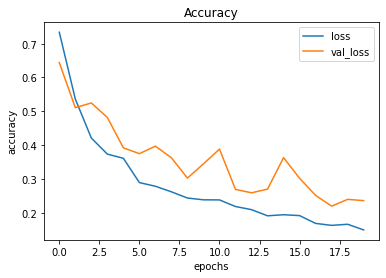

In [31]:
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend(labels=['loss','val_loss'],loc='upper right')